In [53]:
import sys
import json
import pandas as pd
import matplotlib.pyplot as plt

In [54]:
path = 'MuP_dataset/testing_with_paper_release.jsonl'
with open(path, 'r') as json_file:
    json_list = list(json_file)
    col_name = ["paper_id","summary"]
summary_df = pd.DataFrame(columns=col_name)
for json_str in json_list:
    result = json.loads(json_str)
    df = pd.DataFrame([[result["paper_id"], result["summary"]]], columns=col_name)
    summary_df = pd.concat([summary_df,df])
    # break
(result['paper']).keys()
result.keys()

dict_keys(['paper_id', 'summary', 'paper'])

In [55]:
result['paper_id']

'SP:c70479b2096a52584b242de58272ca8d8565feea'

In [56]:
summary_df.drop(["summary"], inplace=True, axis=1)
summary_df

,paper_id
0,SP:b19df5243359791fbaad005d6f13d7e9fdb0ff63
0,SP:b19df5243359791fbaad005d6f13d7e9fdb0ff63
0,SP:b19df5243359791fbaad005d6f13d7e9fdb0ff63
0,SP:7deb61890d97422a0fe141ca807f968c70ab239a
0,SP:7deb61890d97422a0fe141ca807f968c70ab239a
...,...
0,SP:86c61a658d07ab86e2d84cef7e480bf7a06e4ddb
0,SP:c70479b2096a52584b242de58272ca8d8565feea
0,SP:c70479b2096a52584b242de58272ca8d8565feea
0,SP:c70479b2096a52584b242de58272ca8d8565feea


In [57]:
summary_df.reset_index(drop=True, inplace=True)
summary_df

,paper_id
0,SP:b19df5243359791fbaad005d6f13d7e9fdb0ff63
1,SP:b19df5243359791fbaad005d6f13d7e9fdb0ff63
2,SP:b19df5243359791fbaad005d6f13d7e9fdb0ff63
3,SP:7deb61890d97422a0fe141ca807f968c70ab239a
4,SP:7deb61890d97422a0fe141ca807f968c70ab239a
...,...
4606,SP:86c61a658d07ab86e2d84cef7e480bf7a06e4ddb
4607,SP:c70479b2096a52584b242de58272ca8d8565feea
4608,SP:c70479b2096a52584b242de58272ca8d8565feea
4609,SP:c70479b2096a52584b242de58272ca8d8565feea


In [59]:
df_test = pd.DataFrame(summary_df.groupby(["paper_id"])["paper_id"].count())
df_test.columns = ["duplicated"]
df_test.reset_index(inplace=True)
df_test.sort_values('duplicated', ascending=False, inplace=True)
df_test.reset_index(drop=True, inplace=True)
df_test

,paper_id,duplicated
0,SP:da4f21d107a7f442c4d3e3ec13bdb44b041e07cf,10
1,SP:c731a78c3e7f98ccd0253b51a0d42bf8deeb71f9,9
2,SP:5bb42b178b0d27da271bfa60e633fdac718638c4,9
3,SP:f32eddbb5c33a8422c075579ff08aa9833338d44,9
4,SP:af08109d4c45dc9401efb0e63c22167e9da28adb,9
...,...,...
1047,SP:7842bbe0e2324cfd732db8745550733ccc3dfcdc,3
1048,SP:b70ceead1bf6c7dc684c74501716e7012b891022,3
1049,SP:b6ddc3a560aa7155e7e927bf5360bedc36586597,3
1050,SP:788fd2b6956dd69bf7752d39ea21883947128c8a,3


In [61]:
df_test_number = pd.DataFrame(df_test.groupby(["duplicated"])["duplicated"].count())
df_test_number.columns = ["papers"]
# df_test_number.set_index = ["duplicated_paper"]
df_test_number.reset_index(inplace=True)
# df_test_number.columns = ["summaries", "summaries"]
df_test_number

,duplicated,papers
0,3,399
1,4,304
2,5,111
3,6,98
4,7,79
5,8,48
6,9,12
7,10,1


<AxesSubplot: xlabel='duplicated'>

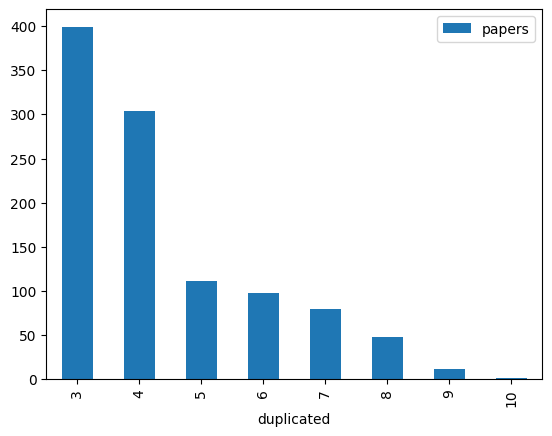

In [65]:
fig, ax = plt.subplots()
df_test_number.plot.bar(x="duplicated", ax=ax)
# ax.legend(False)